In [ ]:
# define Node, Edge, WeightedEdge classes

class Node(object):
    def __init__(self, name) -> None:
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self) -> str:
        return self.name

class Edge(object):
    def __init__(self, src, dest) -> None:
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self) -> str:
        return self.src.getName() + "->" + self.dest.getName()
    
class WeightedEdge(Edge):
    def __init__(self, src, dest, weight = 1.0) -> None:
        """Assumes src and dest are nodes, weight a number"""
        self.src = src
        self.dest = dest
        self.weight = weight
    def getWeight(self):
        return self.weight
    def __str__(self) -> str:
        return self.src.getName() + "->(" + str(self.weight) + ")" + self.dest.getName()        

In [ ]:
# define Graph classes

class Digraph(object):
    # nodes is a list of the nodes in the graph
    # edges is a dict mapping each node to a list of its children
    def __init__(self):
        self.nodes = []
        self.edges = {}  # consists of source:destinations pairs where key is a single node but value is a list of nodes
    def addNode(self, node):
        if node in self.nodes:
            raise ValueError("Duplicate Node")
        else:
            self.nodes.append(node)
            self.edges[node] = []  # create an empty list as children of the new node
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.nodes and dest in self.nodes):
            raise ValueError("Node not in graph")
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.nodes
    def __str__(self):
        result = ""
        for src in self.nodes:
            for dest in self.edges[src]:
                result = result + src.getName() + "->" + dest.getName() + "\n"
        return result[:-1]  # omit final newline
                
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

In [ ]:
nodes = []
nodes.append(Node("ABC")) # nodes[0]
nodes.append(Node("ACB")) # nodes[1]
nodes.append(Node("BAC")) # nodes[2]
nodes.append(Node("BCA")) # nodes[3]
nodes.append(Node("CAB")) # nodes[4]
nodes.append(Node("CBA")) # nodes[5]

g = Graph()
for n in nodes:
    g.addNode(n)
    
for n in g.nodes:
    print(n.getName())

ABC
ACB
BAC
BCA
CAB
CBA


In [ ]:
# Generate and add edges
for n in nodes:
    name = n.getName()
    name1 = name[0] + name[2] + name[1]
    name2 = name[1] + name[0] + name[2]
    for n_dest in nodes:
        if n_dest.getName() == name1:
            g.edges[n].append(n_dest)
        if n_dest.getName() == name2:
            g.edges[n].append(n_dest)

print(g)

ABC->ACB
ABC->BAC
ACB->ABC
ACB->CAB
BAC->ABC
BAC->BCA
BCA->BAC
BCA->CBA
CAB->ACB
CAB->CBA
CBA->BCA
CBA->CAB


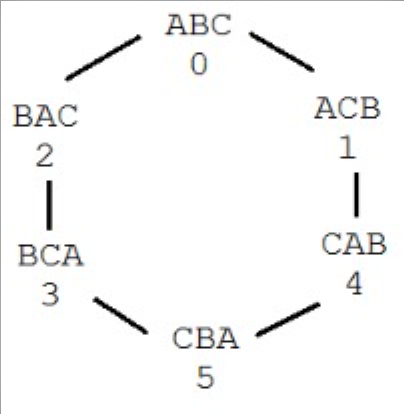